In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [4]:
#split_data
x=data.drop(['Unnamed: 0','result'],axis=1)
y=data['result']

In [5]:
y.value_counts()

result
0    755
1    108
Name: count, dtype: int64

In [6]:
# create SMOTE object with strategy to handle missing values
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
# apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', y_resampled.value_counts())

Resampled class distribution: result
1    755
0    755
Name: count, dtype: int64


In [7]:
#split_data
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [8]:
#scaling the data
x_scaler=StandardScaler()
x_train=x_scaler.fit_transform(x_train)
x_valid=x_scaler.transform(x_valid)
x_test=x_scaler.transform(x_test)

In [9]:
#Grid-search(no_k)
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25]}

knn=KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid,scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3}
Best score:  0.9150846642807542


In [10]:
#build knn_model
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
#check-overfitting
y_pred_train=knn.predict(x_train)
y_pred_valid=knn.predict(x_valid)
accuracy_score_train=accuracy_score(y_train,y_pred_train)
accuracy_score_valid=accuracy_score(y_valid,y_pred_valid)
print(f'the accuracy of train={accuracy_score_train}')
print(f'the accuracy of validation={accuracy_score_valid}')

the accuracy of train=0.9679089026915114
the accuracy of validation=0.9338842975206612


In [12]:
#evaluation(confusion-recall-precision-f-score-roc_curve-AUC)
y_pred=knn.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[126,  22],
       [  2, 152]], dtype=int64)

<Axes: >

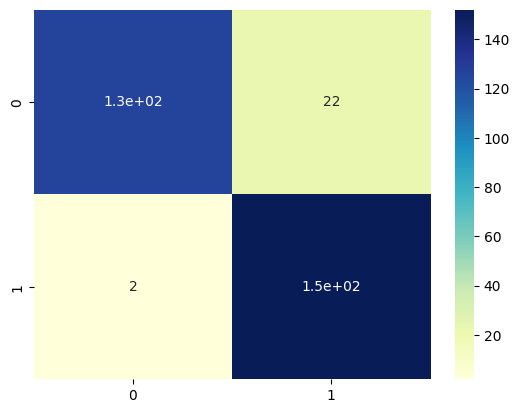

In [13]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu')

In [14]:
# accuracy_score=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precesion=precision_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

In [15]:
# print(f'{accuracy_score * 100} %')
print(f'{recall * 100} %')
print(f'{precesion * 100} %')
print("F1 score:", f1)

98.7012987012987 %
87.35632183908046 %
F1 score: 0.9199363732767762


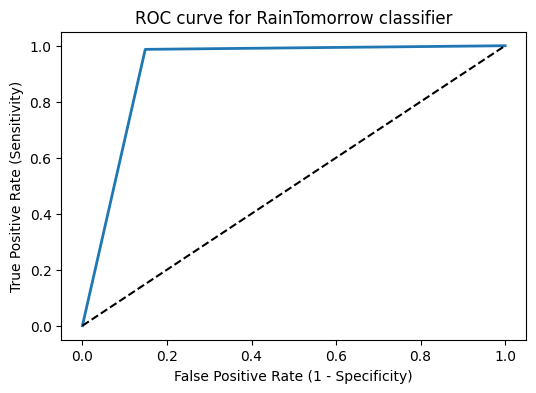

In [16]:
# plot ROC Curve
y_pred1 = knn.predict(x_test)
    
# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [17]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(f'ROC AUC : {ROC_AUC}')

ROC AUC : 0.9191821691821691


In [18]:
#Logistic Regression
lr = LogisticRegression()
# Fit the model to the training data
lr=lr.fit(x_train, y_train)
# Make predictions on the testing data
y_pred = lr.predict(x_test)


In [19]:
# Evaluate the model using various metrics
# accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [20]:
# Print the evaluation metrics
# print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9138732888732889
Recall: 0.9138732888732889
F1 score: 0.9138732888732889


<Axes: >

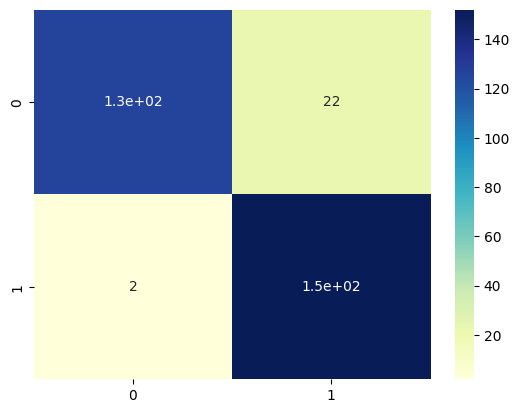

In [21]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu')

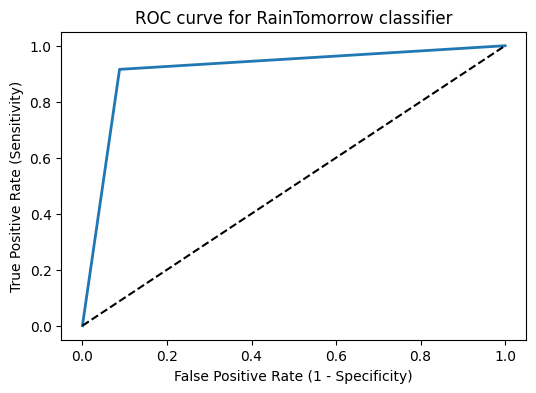

In [22]:
# plot ROC Curve
y_pred1 = lr.predict(x_test)
    
# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [23]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(f'ROC AUC : {ROC_AUC}')

ROC AUC : 0.9138732888732889


In [24]:
#Naïve Bayes
# Train a Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(x_train, y_train)
# Make predictions on the test set
y_pred = model.predict(x_test)


In [25]:
# Evaluate the model using various metrics
# accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [26]:
# Print the evaluation metrics
# print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.8531299435028249
Recall: 0.8427957177957177
F1 score: 0.8429224350674501


<Axes: >

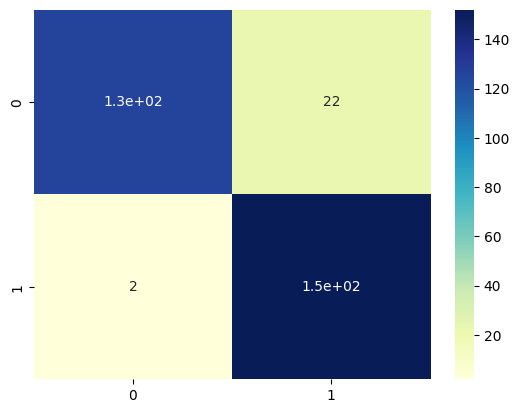

In [27]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu')

<function matplotlib.pyplot.show(close=None, block=None)>

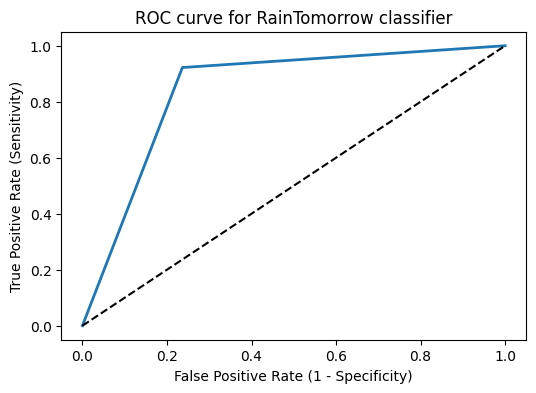

In [28]:
# plot ROC Curve
y_pred1 = model.predict(x_test)
    
# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show

In [29]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(f'ROC AUC : {ROC_AUC}')

ROC AUC : 0.8427957177957177


# phase2


## Decisioin_tree


In [30]:
## I will use the scaled data was calculated in phase 1


In [31]:
##Grid_Search
params={
    'criterion': ['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10],
}

model=DecisionTreeClassifier()
grid=GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [32]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [33]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [34]:
#build model 
model=DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [35]:
# Evaluate the model using various metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [36]:
# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9437898653437278
Recall: 0.9395840645840646
F1 score: 0.9401848591549296


<function matplotlib.pyplot.show(close=None, block=None)>

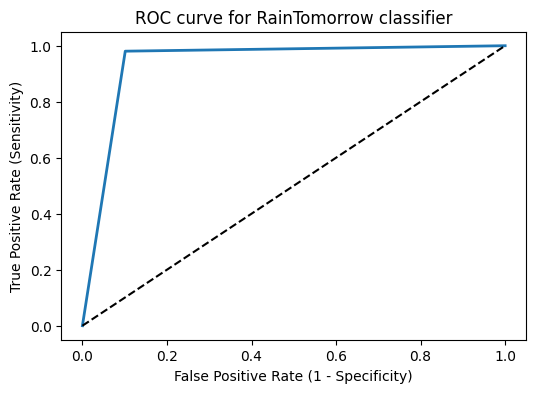

In [37]:
# plot ROC Curve
y_pred1 = model.predict(x_test)
    
# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show

In [38]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(f'ROC AUC : {ROC_AUC}')

ROC AUC : 0.9395840645840646


## SVM

In [39]:

param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf'],
                'gamma': ['auto', 'scale']}

svc=SVC()

grid_search = GridSearchCV(svc, param_grid,scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9637572779231878


In [40]:
svm_model=SVC(C=10,gamma='auto',kernel='rbf')
svm_model.fit(x_train,y_train)

SVC(C=10, gamma='auto')

In [41]:
# Evaluate the model using various metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [42]:
# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9437898653437278
Recall: 0.9395840645840646
F1 score: 0.9401848591549296


<function matplotlib.pyplot.show(close=None, block=None)>

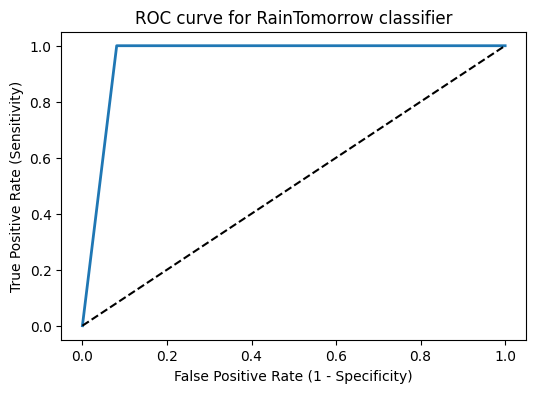

In [43]:
# plot ROC Curve
y_pred1 = svm_model.predict(x_test)
    
# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show

In [44]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(f'ROC AUC : {ROC_AUC}')

ROC AUC : 0.9594594594594594
